**LOAN DEFAULTER PREDICTION**

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
data=hm.copy()

In [4]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [6]:
data.shape

(5960, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
data.isnull().sum().sort_values(ascending=False)

DEBTINC    1267
DEROG       708
DELINQ      580
MORTDUE     518
YOJ         515
NINQ        510
CLAGE       308
JOB         279
REASON      252
CLNO        222
VALUE       112
BAD           0
LOAN          0
dtype: int64

In [9]:
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
DEBTINC,1267,0.212584
DEROG,708,0.118792
DELINQ,580,0.097315
MORTDUE,518,0.086913
YOJ,515,0.086409
NINQ,510,0.085570
CLAGE,308,0.051678
JOB,279,0.046812
REASON,252,0.042282
CLNO,222,0.037248


In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
for i in cols:
    data[i] = data[i].astype('category')

In [13]:
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


In [15]:
data[cols].describe().T

,count,unique,top,freq
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388
BAD,5960,2,0,4771


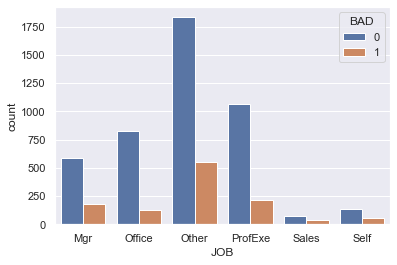

In [16]:
sns.countplot(x='JOB', hue='BAD',data=data)
plt.show()

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

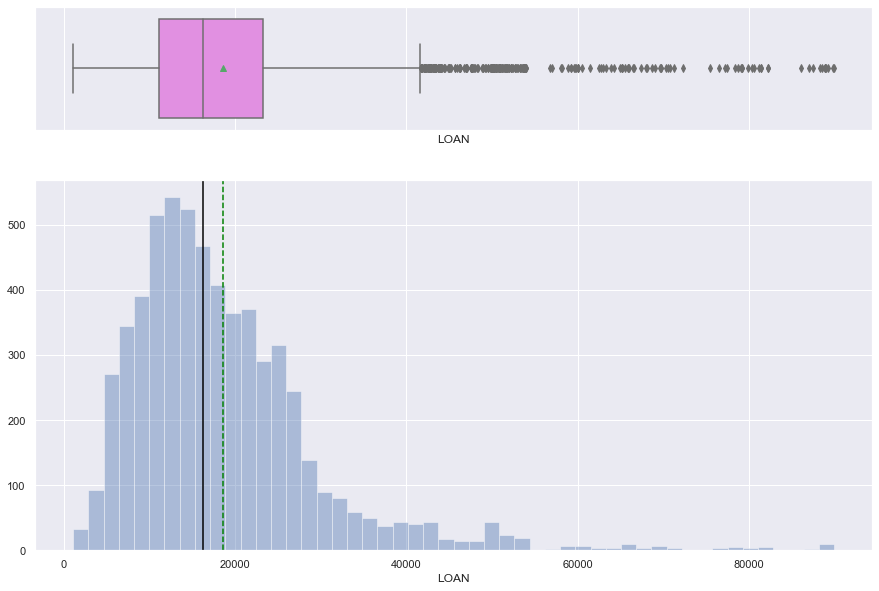

In [18]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights __________**
- The distribution of Loan  is highly right-skewed
- Majority of the Loan are close to 2000
- Median loan is equal to 15000, but the mean is ~500
- There are a lot of outliers in this variable.
- While most Loan are at the lower end, we have observations where loan amount went as high as 80000

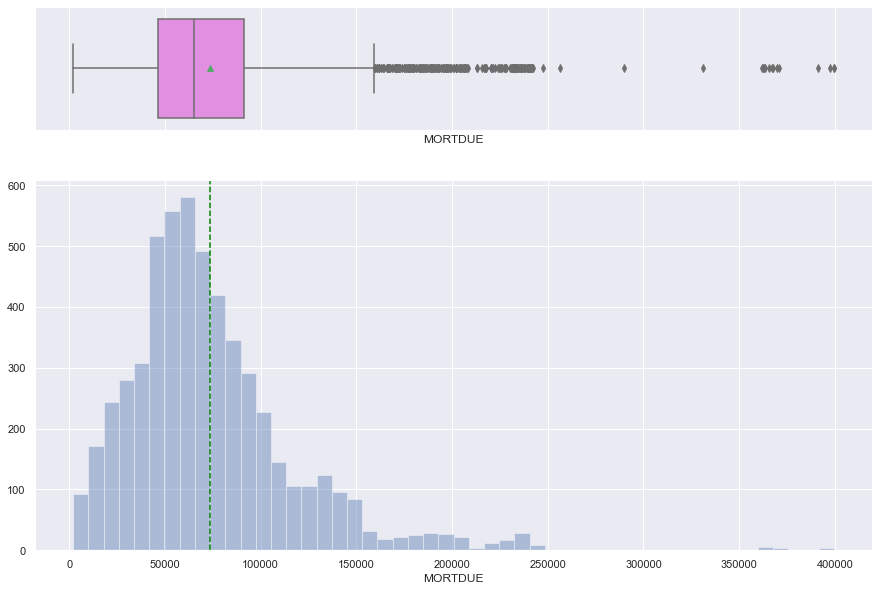

In [19]:
histogram_boxplot(data['MORTDUE'])

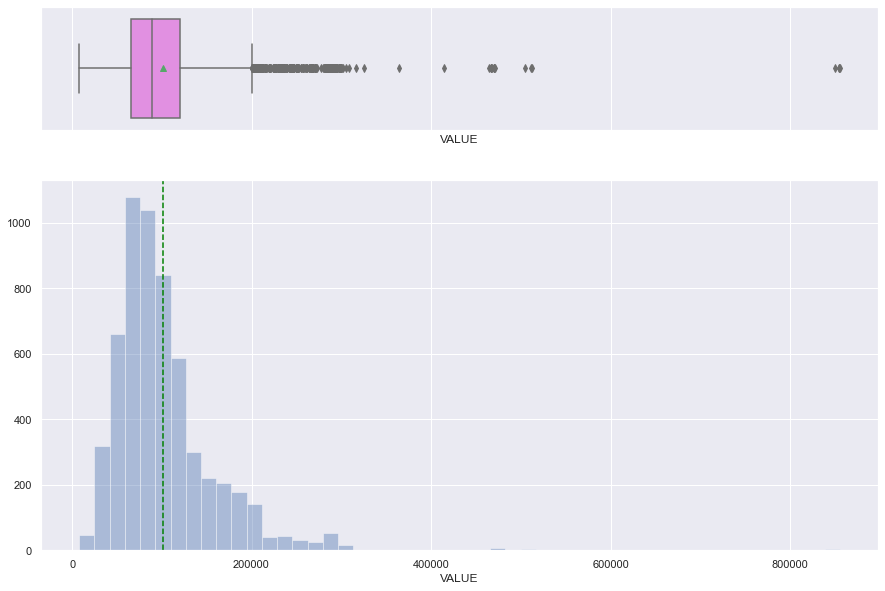

In [20]:
histogram_boxplot(data['VALUE'])

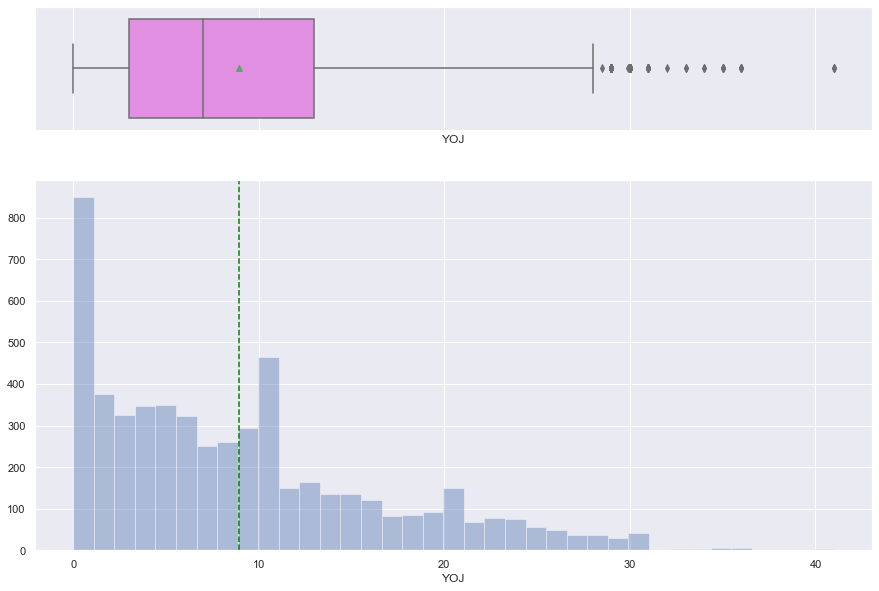

In [21]:
histogram_boxplot(data['YOJ'])

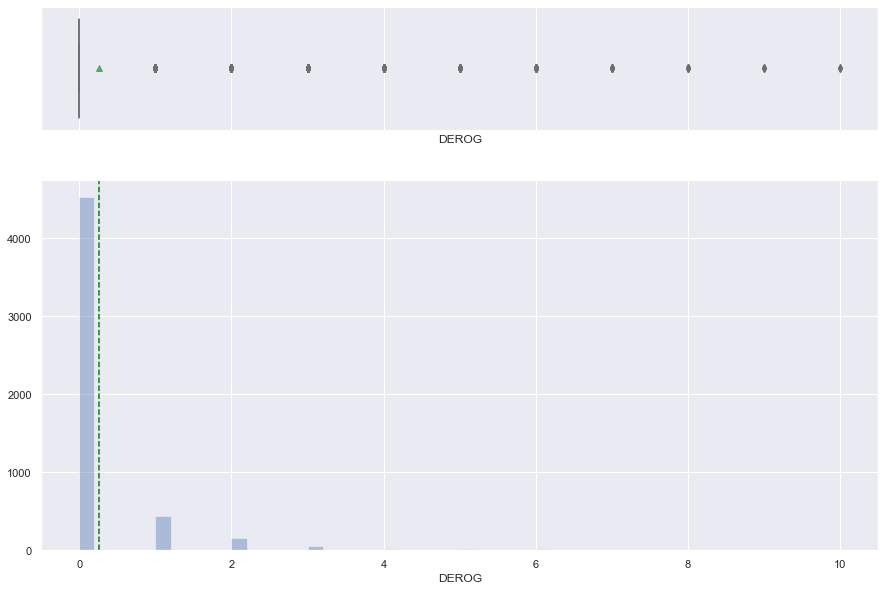

In [22]:
histogram_boxplot(data['DEROG'])

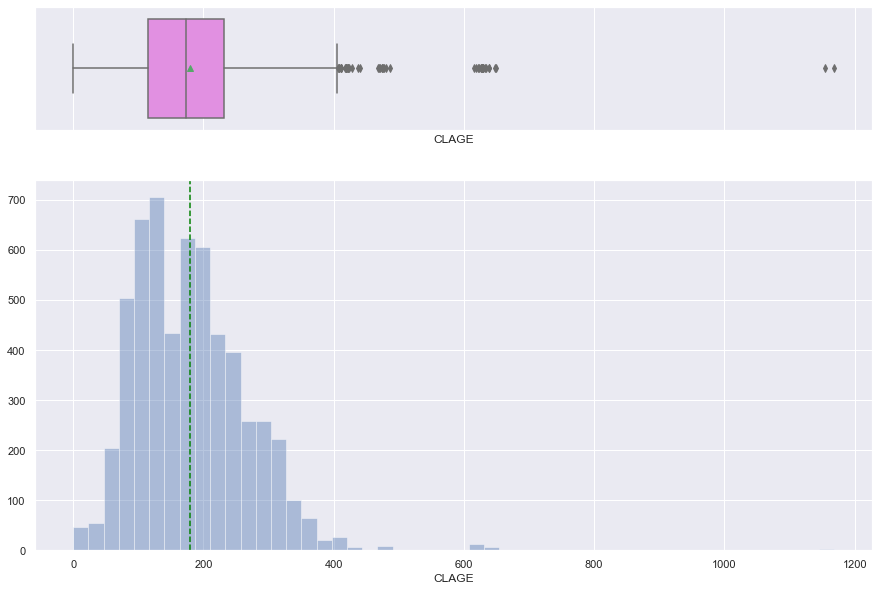

In [23]:
histogram_boxplot(data['CLAGE'])

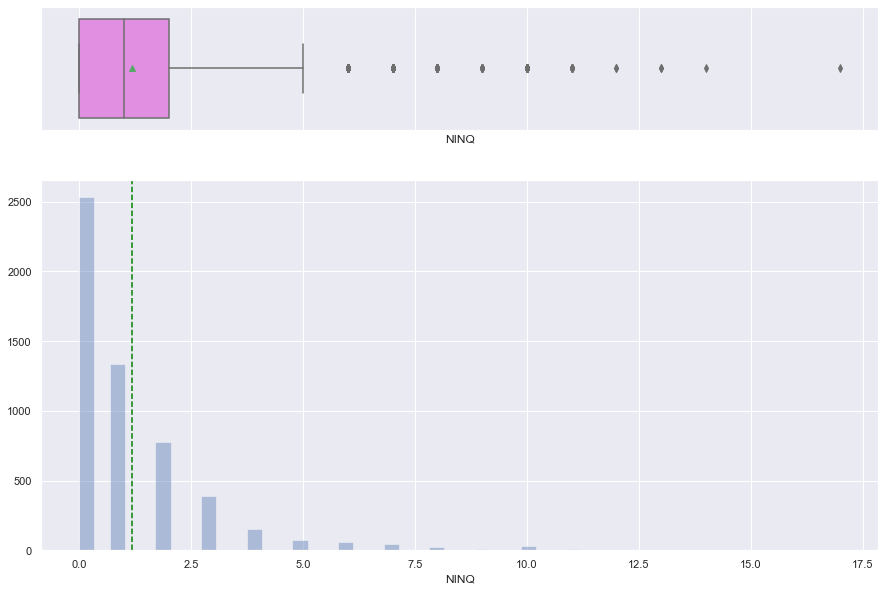

In [24]:
histogram_boxplot(data['NINQ'])

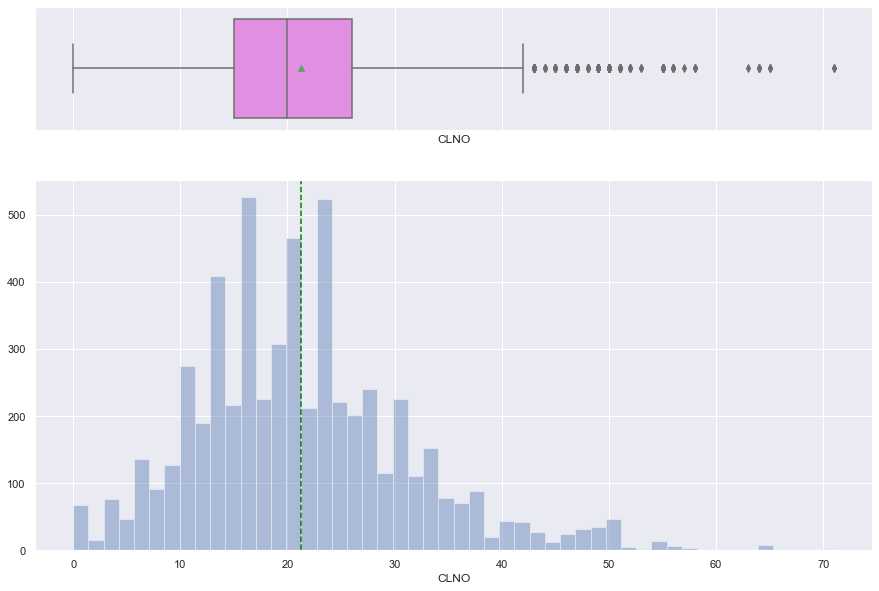

In [25]:
histogram_boxplot(data['CLNO'])

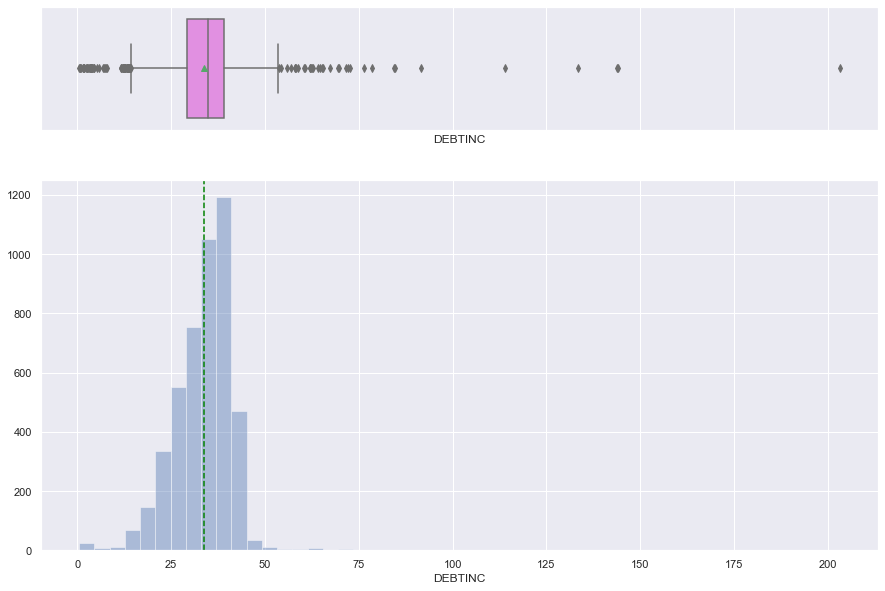

In [26]:
histogram_boxplot(data['DEBTINC'])

### **2. Univariate Analysis - Categorical Data**

In [27]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

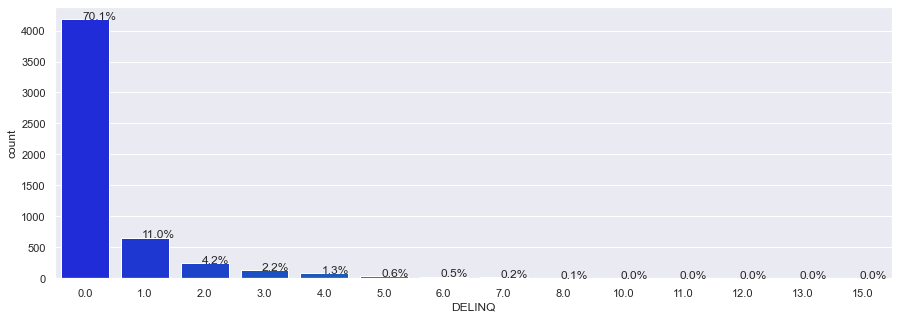

In [28]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

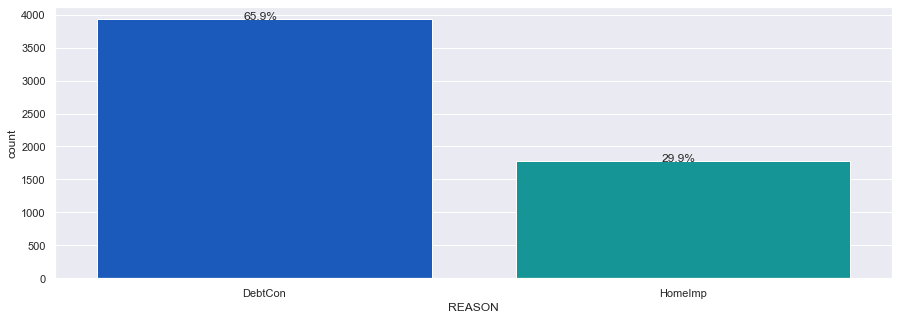

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

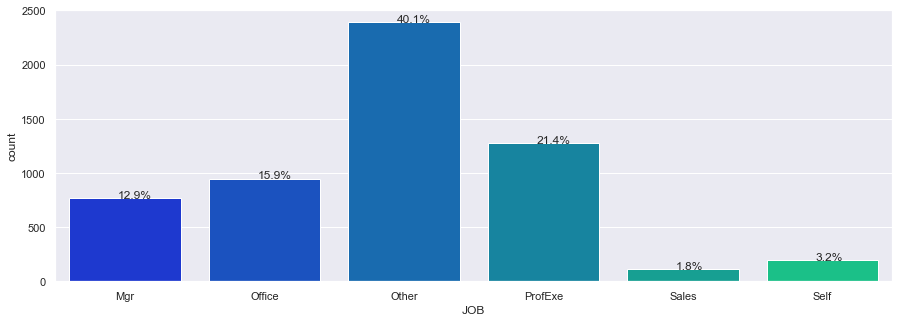

In [30]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

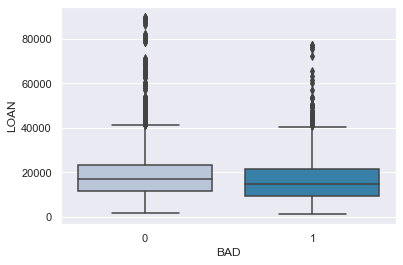

In [31]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='YOJ'>

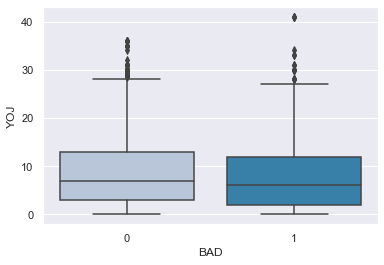

In [32]:
sns.boxplot(data["BAD"],data['YOJ'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

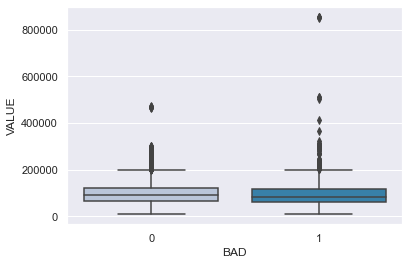

In [33]:
sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='DEROG'>

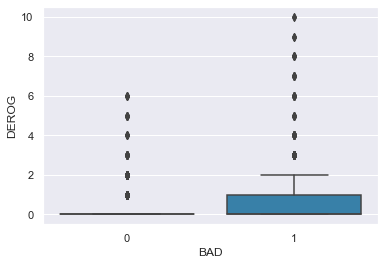

In [34]:
sns.boxplot(data["BAD"],data['DEROG'],palette="PuBu")

- we can see that from above that the number of the major derogatory reports, has an affect on the ability of the applicant to pay back his loan which means the more derogatory reports (and which indicates a serious delinquency or late payments), the higher the chances the customer to be unable to pay back his loan 

<AxesSubplot:xlabel='BAD', ylabel='CLNO'>

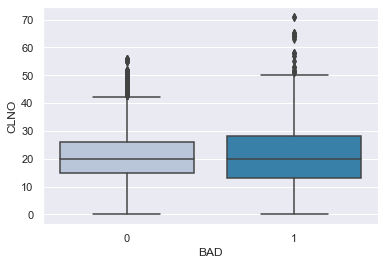

In [35]:
sns.boxplot(data["BAD"],data['CLNO'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

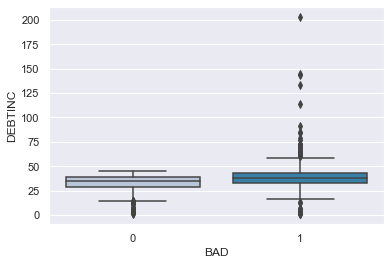

In [36]:
sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='CLAGE'>

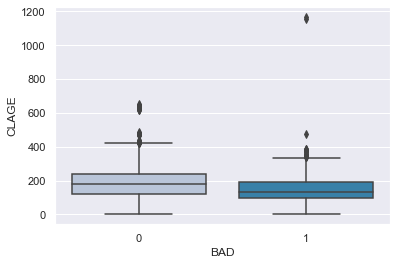

In [37]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

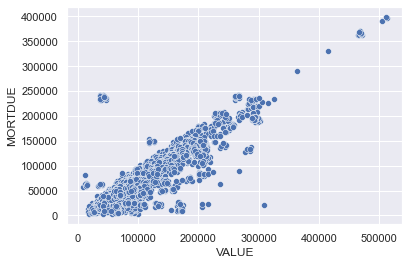

In [38]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

### **Bivariate Analysis:  BAD vs Categorical Variables**

The stacked bar chart (aka stacked bar graph) extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [39]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


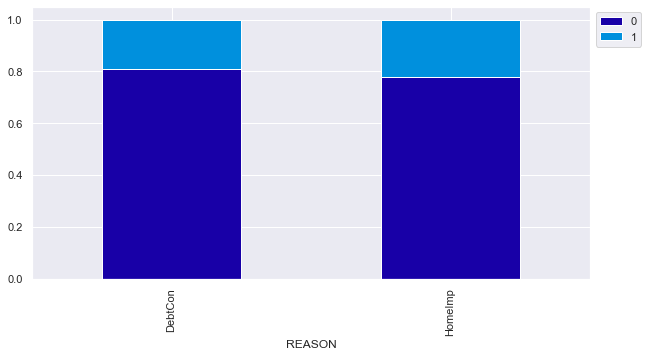

In [40]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


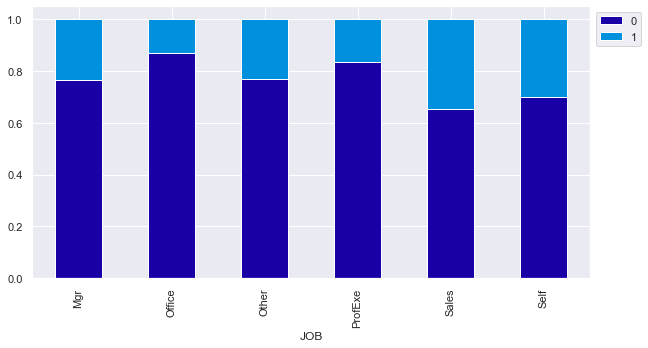

In [41]:
stacked_plot(data['JOB'])

### **Multivariate Analysis**

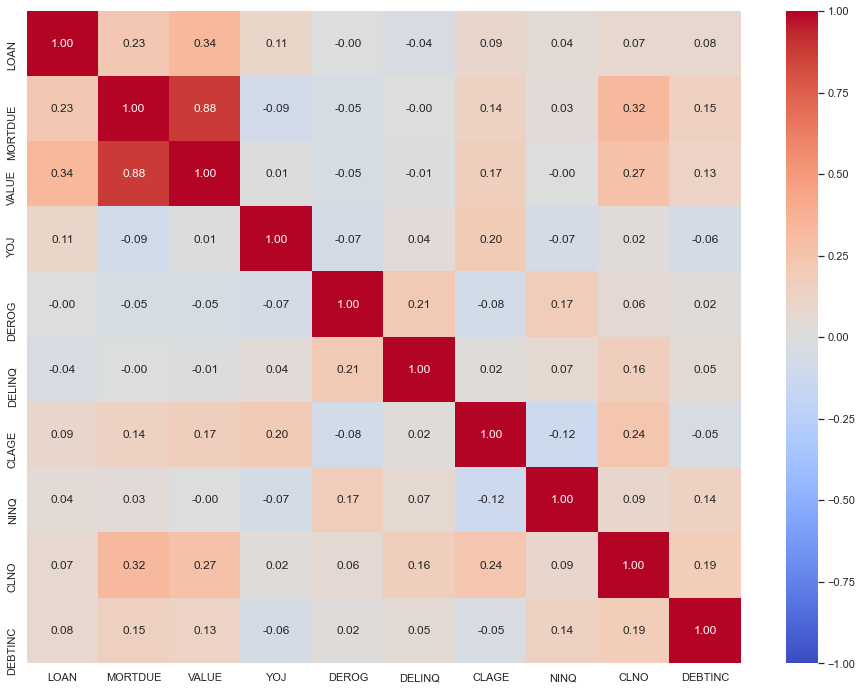

In [42]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()
# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns);

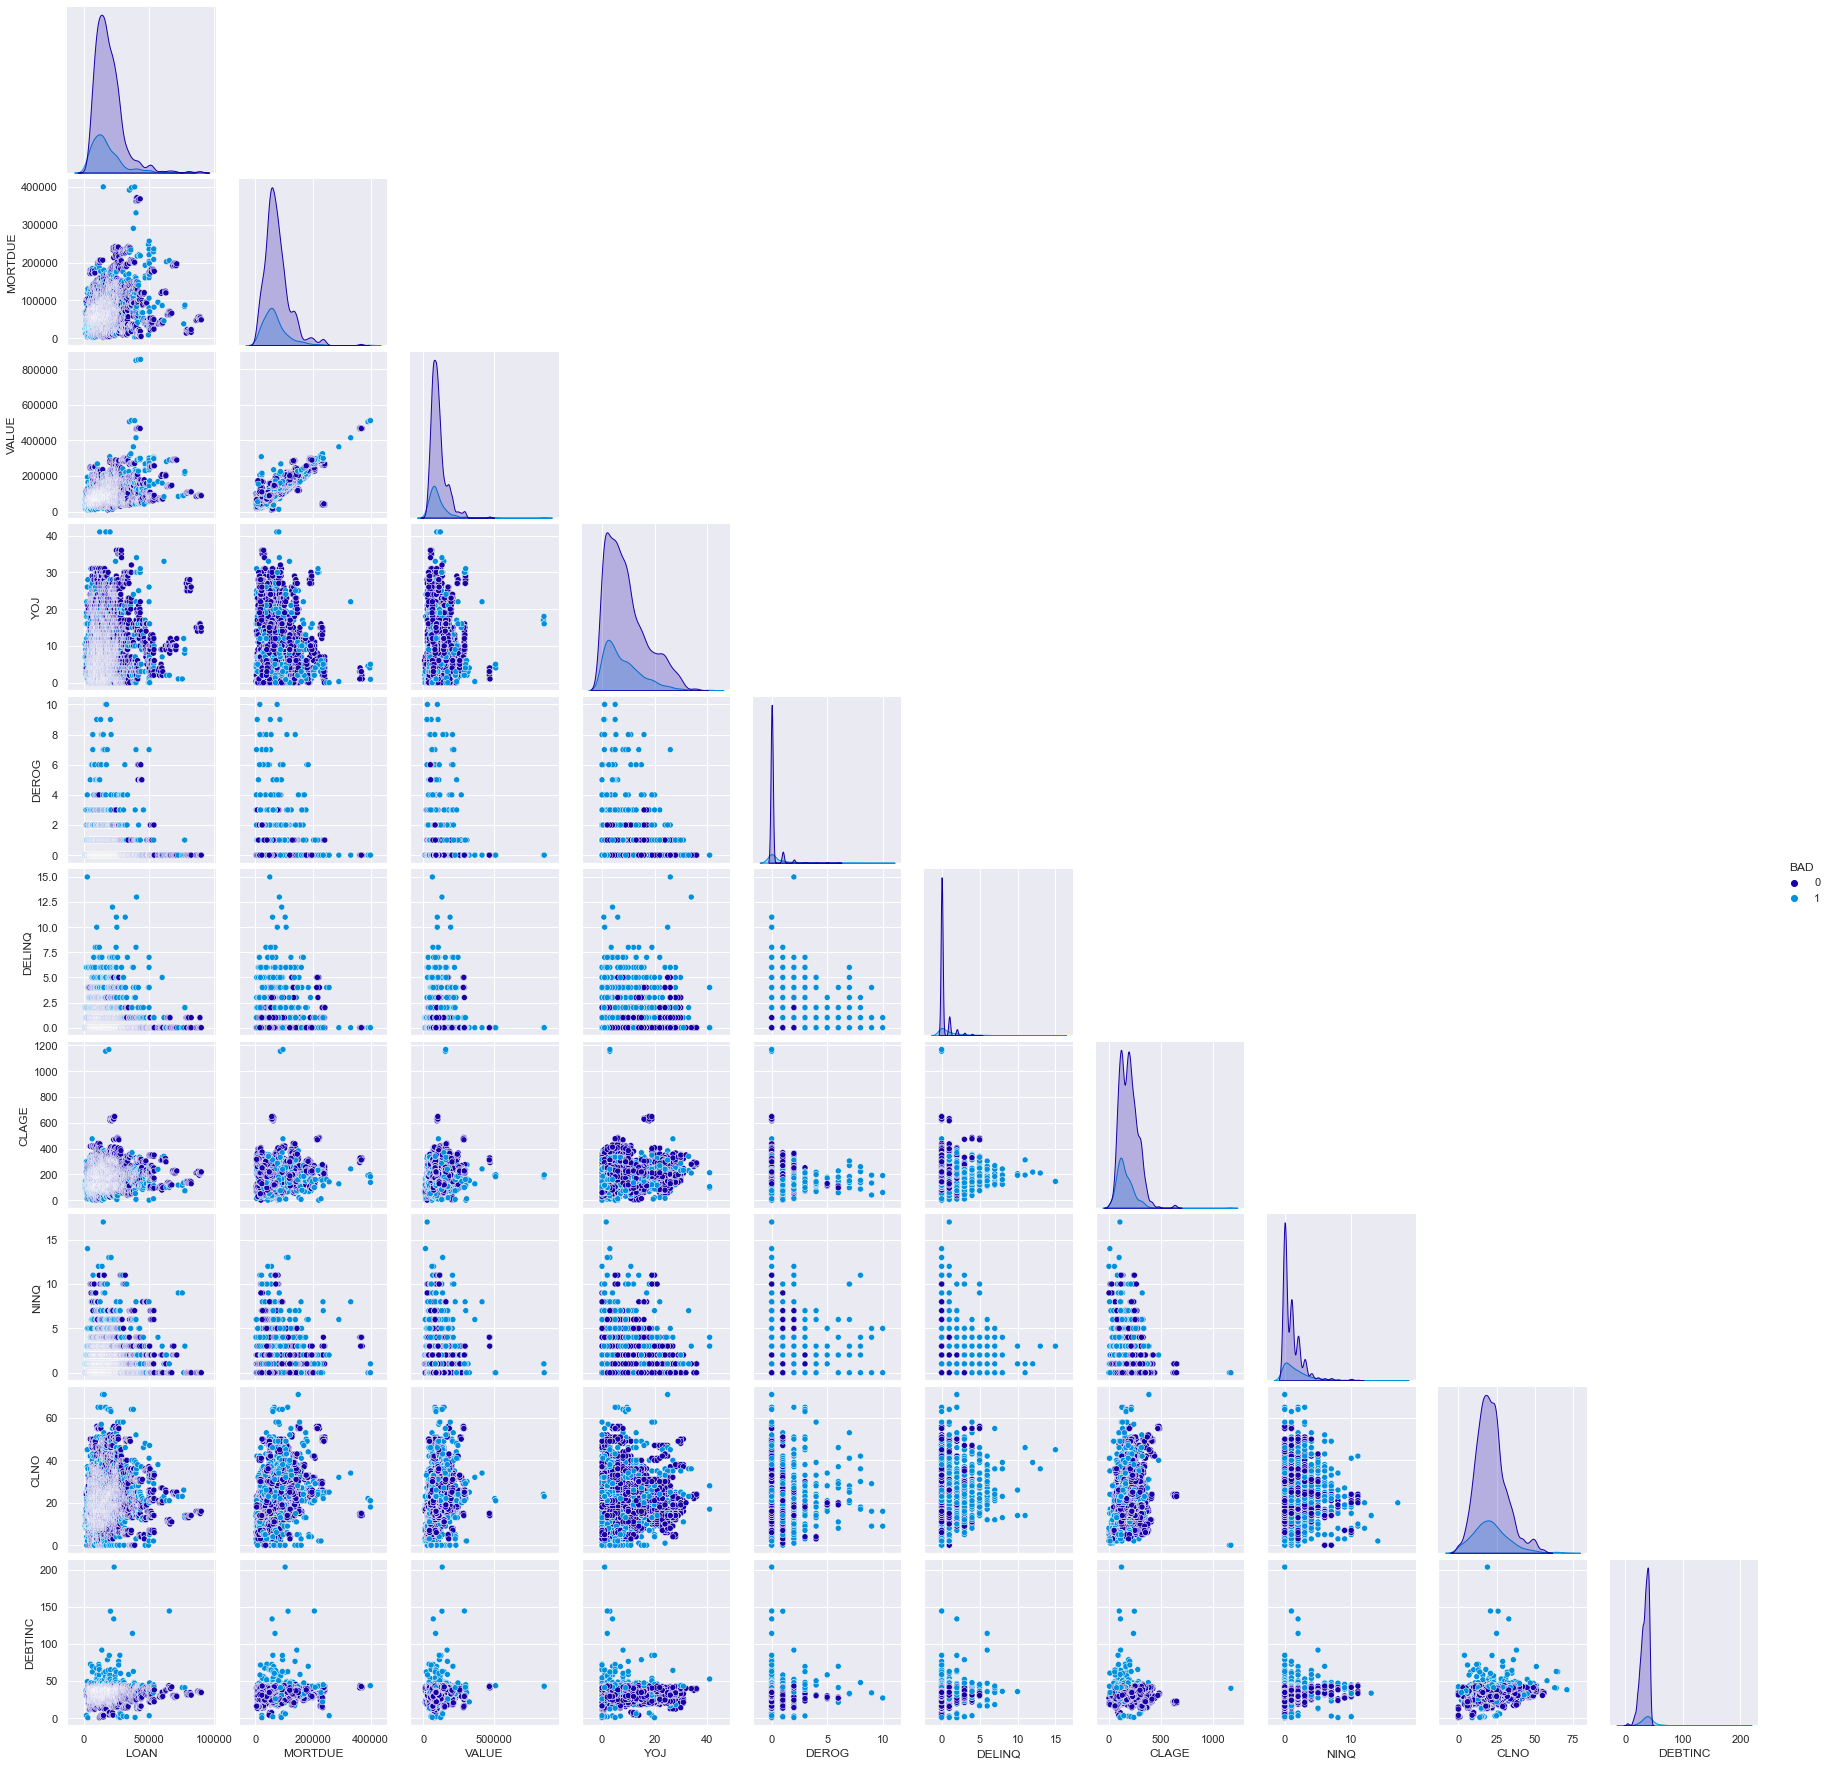

In [43]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data=data,hue='BAD', corner=True)
plt.show()

#### Treating Outliers

In [44]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(q=0.25) # 25th quantile
    Q3=df[col].quantile(q=0.75) # 75th quantile
    IQR=Q3 - Q1   # IQR Range
    Lower_Whisker = Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [45]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values 

In [46]:
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [47]:
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

In [48]:
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [49]:
df.shape

(5960, 24)

In [50]:
df.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

## **Data Preparation**

### **Separating the target variable from other variables**

In [51]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df.drop(columns='BAD')


# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)

Y=df['BAD']

### **Splitting the data into 70% train and 30% test set**

In [52]:
# Split the data into training and test set


X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [53]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
# Defining the Logistic regression model
lg=LogisticRegression(solver='newton-cg', random_state=1)


# Fitting the model on the training data 

lg.fit(X_train,y_train)

LogisticRegression(random_state=1, solver='newton-cg')

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3355
           1       0.72      0.58      0.64       817

    accuracy                           0.87      4172
   macro avg       0.81      0.76      0.78      4172
weighted avg       0.86      0.87      0.87      4172



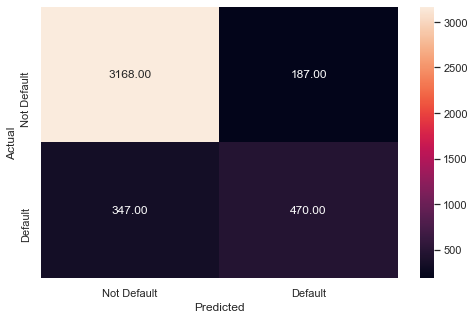

In [56]:
#Predict for train set
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

#checking the performance on the train dataset


#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1416
           1       0.78      0.56      0.65       372

    accuracy                           0.88      1788
   macro avg       0.83      0.76      0.79      1788
weighted avg       0.87      0.88      0.87      1788



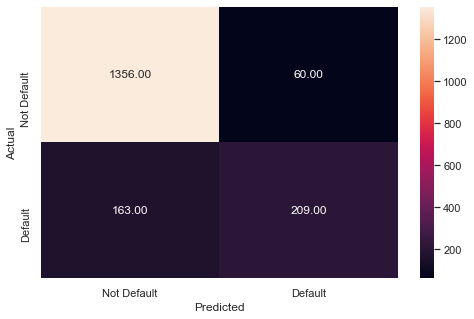

In [57]:
#Predict for test set
#checking the performance on the test dataset


y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)





**Observations: __________**
- We are getting an accuracy of around 88% on train and test dataset.
- However, the recall for this model is around 58% for class 1 on train and 56% on test.
- As the recall is very low, this model will not perform well in differentiating out those applicant who have defaulted, meaning it will eventually not help in reducing the defaulting rate.


#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [58]:
# Printing the coefficients of logistic regression


cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
VALUE_missing_values_flag,3.063694e+00
DEBTINC_missing_values_flag,2.669486e+00
CLAGE_missing_values_flag,1.074814e+00
CLNO_missing_values_flag,1.064613e+00
JOB_Sales,7.725936e-01
REASON_missing_values_flag,2.194073e-01
NINQ,1.849156e-01
REASON_HomeImp,1.607018e-01
DEBTINC,8.642637e-02
JOB_Self,7.501492e-02


**Insights ________**
- VALUE_missing_values_flag is the most important variable in predicting loan eligibility using logistic regression, shows that people apply for loan and are not showing their past loan accurately.
- Other 3 factors are also DEBTINC_missing_values_flag, CLAGE_missing_values_flag, CLNO_missing_values_flag signifies that the missing values plays a major role in approaving the loan amount.
- Some features which positively affect the loan approval rate are:
- - Debt-to-income ratio
- - Number of existing credit lines
- - Number of delinquent credit lines
- - Number of recent credit inquiries
- - Number of major derogatory reports 
- Some features which negatively affect the loan approval rate are:
- - Amount due on the existing mortgage
- - Amount of loan approved
- - The type of job that loan applicant has ProfExe and office job
- - Years at present job
- - Age of the oldest credit line in months


- The above Logistic regression model was build on the threshold of 0.5, we did use different threshold by getting optimal threshod


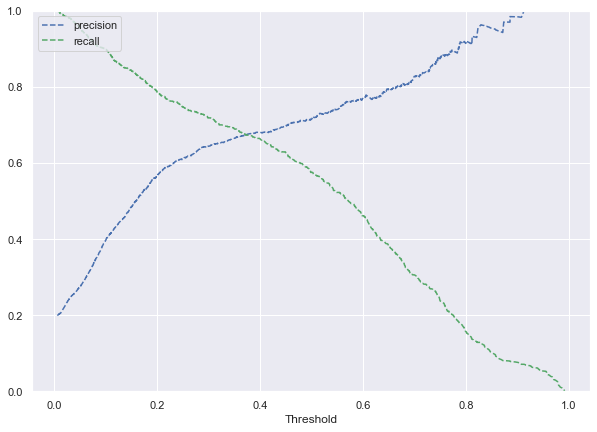

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
y_scores=lg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [60]:
for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])

0.3716742238402892


- The threshold of 0.30 would give a balanced precision and recall

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3355
           1       0.64      0.72      0.68       817

    accuracy                           0.87      4172
   macro avg       0.79      0.81      0.80      4172
weighted avg       0.87      0.87      0.87      4172



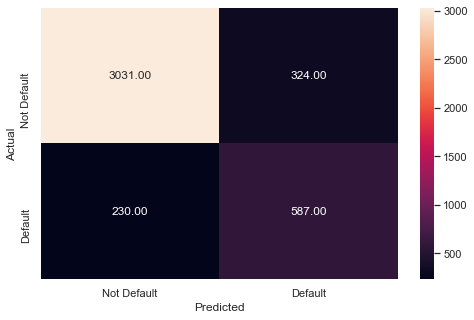

In [61]:
optimal_threshold1 = 0.30
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

- The precision has dropped but the recall for class 1 has increased to 0.72%; the class and metric of interest here.
- The model is able to identify the applicant loan which are defaulted, and would hence be a more useful model than the previous iteration with the default threshold.
- True Negative is more than False positive and False negative.

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1416
           1       0.69      0.70      0.69       372

    accuracy                           0.87      1788
   macro avg       0.81      0.81      0.81      1788
weighted avg       0.87      0.87      0.87      1788



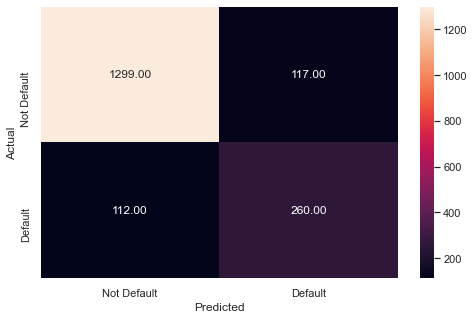

In [62]:
#Checking performance on the testing data
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

#### Data Preparation for the tree based model

In [63]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [64]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

#### Separating the target variable y and independent variable x

In [65]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix

X = data.drop(columns='BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)

y = data['BAD']

#### Split the data

In [66]:
# Split the data into training and test set



X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

In [67]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}


dt = DecisionTreeClassifier(criterion='gini', class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [68]:
#fitting Decision tree model

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



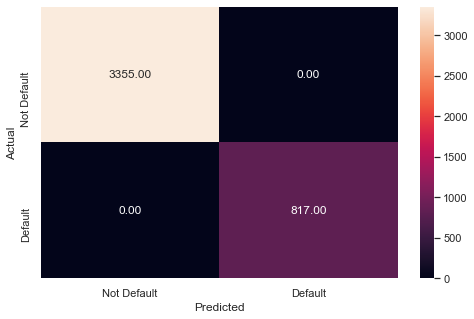

In [69]:
# Checking performance on the training data


y_train_pred_dt=dt.predict(X_train)
metrics_score(y_train,y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1416
           1       0.70      0.62      0.66       372

    accuracy                           0.87      1788
   macro avg       0.80      0.77      0.79      1788
weighted avg       0.86      0.87      0.86      1788



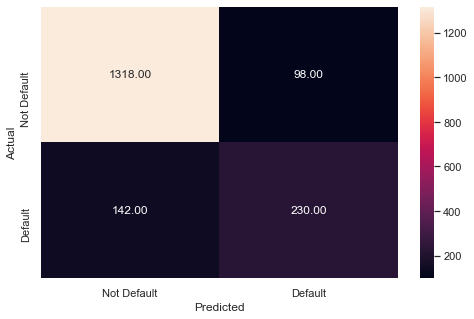

In [70]:
# Checking performance on the testing data


y_test_pred_dt=dt.predict(X_test)
metrics_score(y_test,y_test_pred_dt)

### **Decision Tree - Hyperparameter Tuning**


#### Using GridSearchCV for Hyperparameter tuning on the model

In [71]:
# Choose the type of classifier. 

d_tree_tuned = DecisionTreeClassifier(random_state=1, class_weight={0:0.2, 1:0.80})

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(2,30), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1,2,5,7,10],
              'min_impurity_decrease':[0.0001,0.001,0.01,0.1],
              'max_leaf_nodes': [2,3,5,10,15]

 }
# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(recall_score, pos_label=1)


# Run the grid search

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer,n_jobs=1)



# Fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters

d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=10,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3355
           1       0.59      0.83      0.69       817

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.80      4172
weighted avg       0.88      0.85      0.86      4172



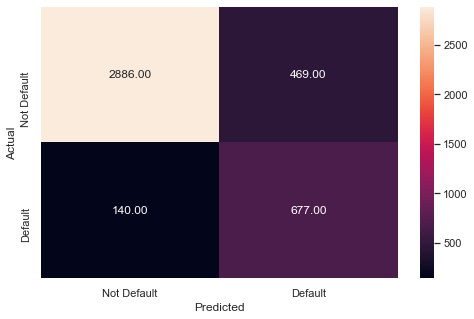

In [72]:
# Checking performance on the training data based on the tuned model


y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train,y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1416
           1       0.59      0.79      0.68       372

    accuracy                           0.84      1788
   macro avg       0.77      0.82      0.79      1788
weighted avg       0.87      0.84      0.85      1788



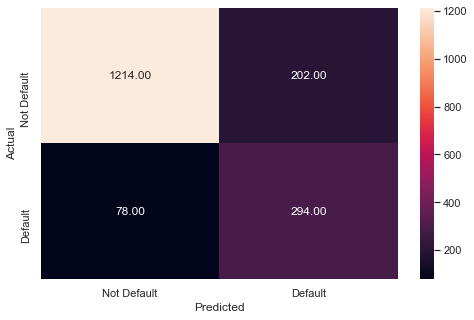

In [73]:
# Checking performance on the testing data based on the tuned model


y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test,y_pred_test2)


**Insights ___________**
- This model is not over-fitting on the training data, and giving approx. the same result on the test and train datasets.
- The model is giving similar performance on the test and train data i.e. the model is giving a generalized performance.
- The recall and precisionof the test data has increased significantly.
- The average recall and precision for the model are good 

#### Plotting the Decision Tree

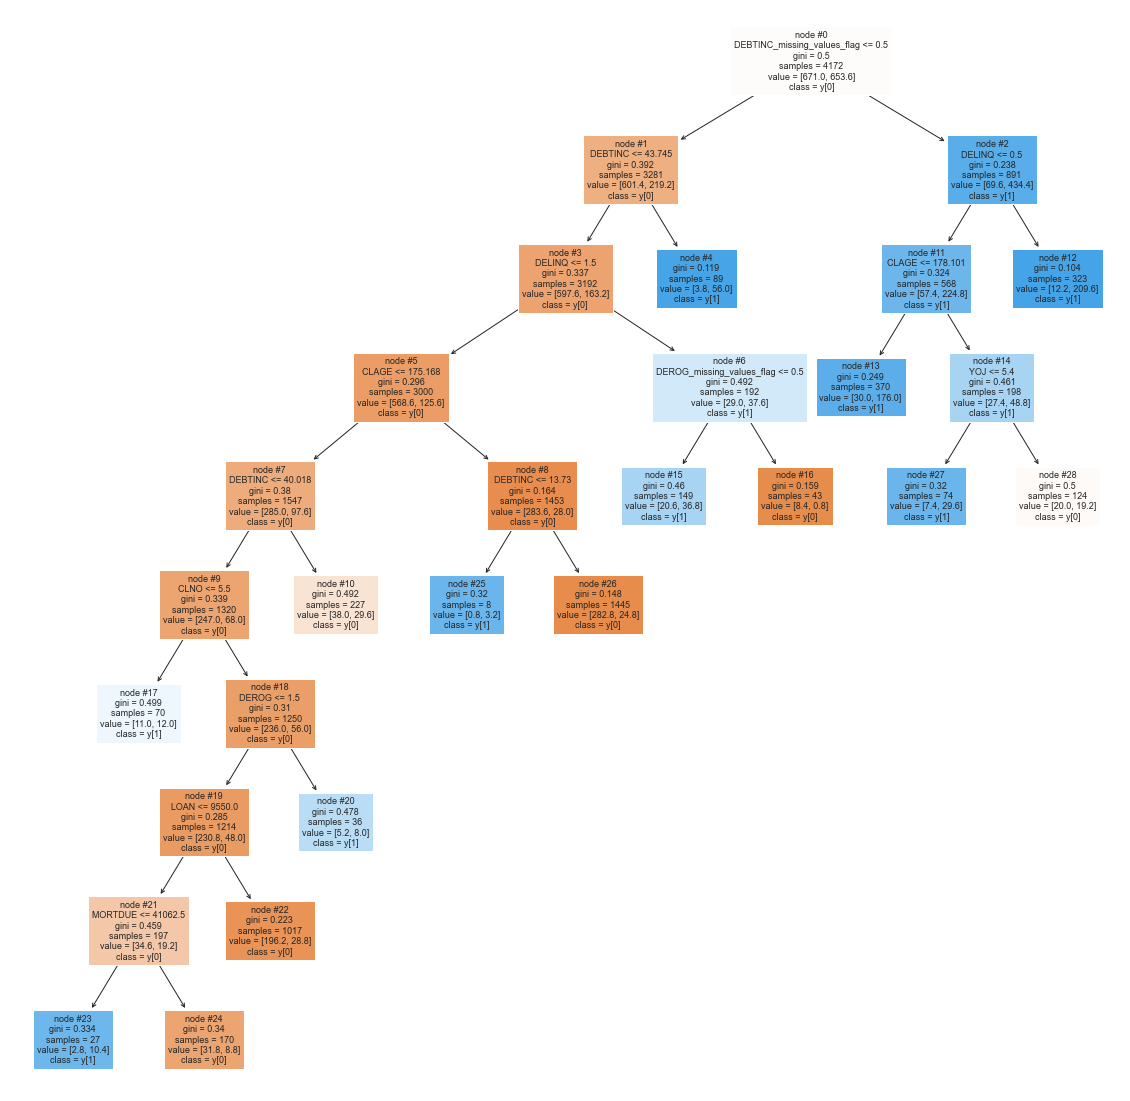

In [74]:
# Plot the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize=(20,20))

tree.plot_tree(d_tree_tuned,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: _____
- Blue leaves represent the eligible class i.e. y[1] and the orange leaves represent the non-eligible class i.e. y[0].

- if customer's DEBTINC is missing,then those customers will default.
- if customers's DEBTINC greater than 43.7,then those customers will default.
- if customer's DEBTINC less than 43.7 and DELINC is greater than 1.5,then those customers will default.

- We can see that the first split is based on the debt to income ratio of the applicant. It is one of the most important factors while figuring out who defaulted, as we can see that in the leaves, less applicant defaulted due to high debt to income ratio. 
-.

In [75]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DEBTINC_missing_values_flag  0.622160
DEBTINC                      0.189722
DELINQ                       0.065782
CLAGE                        0.040752
MORTDUE                      0.018302
DEROG_missing_values_flag    0.013715
DEROG                        0.013365
CLNO                         0.013075
LOAN                         0.012811
YOJ                          0.010317
NINQ_missing_values_flag     0.000000
JOB_Other                    0.000000
JOB_Office                   0.000000
REASON_HomeImp               0.000000
JOB_ProfExe                  0.000000
JOB_Sales                    0.000000
CLNO_missing_values_flag     0.000000
JOB_missing_values_flag      0.000000
CLAGE_missing_values_flag    0.000000
DELINQ_missing_values_flag   0.000000
YOJ_missing_values_flag      0.000000
REASON_missing_values_flag   0.000000
VALUE_missing_values_flag    0.000000
MORTDUE_missing_values_flag  0.000000
NINQ                         0.000000
VALUE       

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [76]:
# Defining Random forest CLassifier


rf_estimator = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=7)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



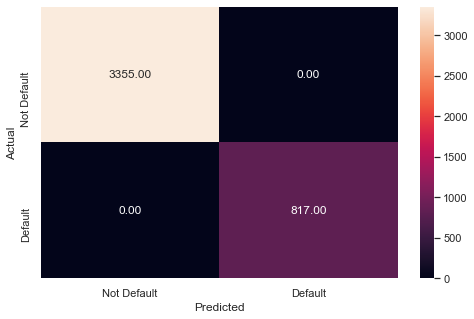

In [77]:
#Checking performance on the training data

y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

- The Random Forest is giving a 100% result on the training dataset

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1416
           1       0.87      0.66      0.75       372

    accuracy                           0.91      1788
   macro avg       0.89      0.82      0.85      1788
weighted avg       0.91      0.91      0.90      1788



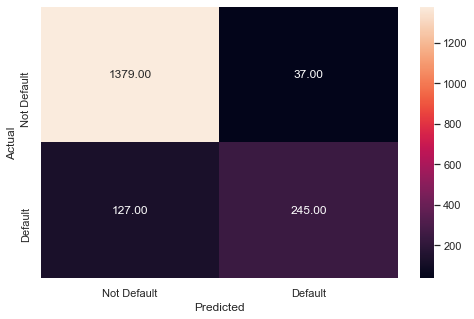

In [78]:
# Checking performance on the test data


y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

**Observations: __________**
- The Random Forest classifier not so well on the test data.
- Recall on test dataset is 66% as compared to 1 for the training dataset. So The Random Forest is over fitting.
- Precision on the test data using the Random Forest is much bether than decision tree.

### **Build a Random Forest model with Class Weights**

In [79]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}



rf_estimator_tuned = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

# Fitting Random Forest model

rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



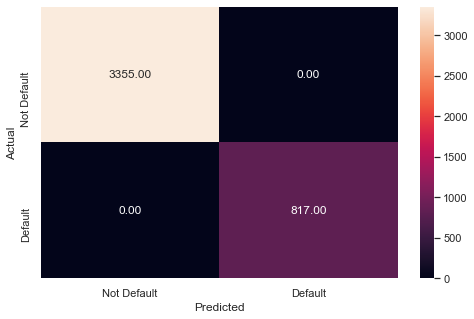

In [80]:
# Checking performance on the train data

y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1416
           1       0.85      0.66      0.74       372

    accuracy                           0.91      1788
   macro avg       0.88      0.82      0.84      1788
weighted avg       0.90      0.91      0.90      1788



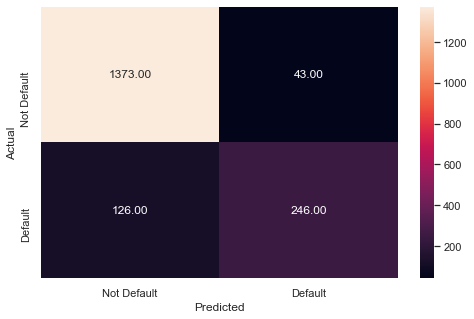

In [81]:
# Checking performance on the test data

y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_rf_tuned)

### **Tuning the Random Forest**

In [82]:
# Choose the type of classifier. 

rf_estimator_tuned2 = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)


# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)


# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned2, parameters, scoring=scorer, cv=5)


#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
rf_estimator_tuned2 = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
rf_estimator_tuned2.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       max_features=1, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3355
           1       0.66      0.81      0.73       817

    accuracy                           0.88      4172
   macro avg       0.80      0.85      0.82      4172
weighted avg       0.89      0.88      0.88      4172



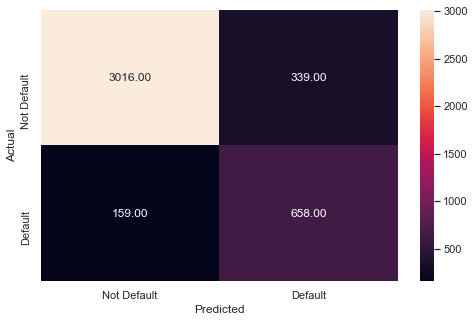

In [83]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned2.predict(X_train)
metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1416
           1       0.69      0.75      0.72       372

    accuracy                           0.88      1788
   macro avg       0.81      0.83      0.82      1788
weighted avg       0.88      0.88      0.88      1788



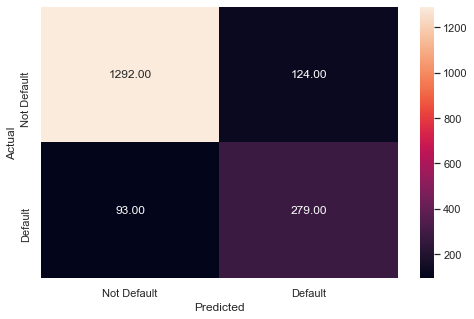

In [84]:
# Checking performace on test dataset
y_pred_test4 = rf_estimator_tuned2.predict(X_test)
metrics_score(y_test, y_pred_test4)

**Insights: _____**

- Predicting a customer will default and customer doesnt default in reality.(False Positive)
- Predicting a customer will not default and the customer default in reality.(False Negative).
- The best model we have got so far is the tuned random forest model which is giving nearly ~88% accuracy on the test data .
- The company should use this model to know beforehand which applicant is going to default and act accordingly.
- As the recall is high around 75%, this model will perform well in differentiating out those applicants that have a high chance to default the loan, meaning it will eventually help in reducing the loan defaulting rate.

Which loss is more important or more expensive?
- Predicting that customers will not default but he defaults in reality(False Negative)is more expensive as this will lead to huge loss for bank when customers will not be paying loan back to banks.

#### Plot the Feature importance of the tuned Random Forest

<AxesSubplot:xlabel='Importance'>

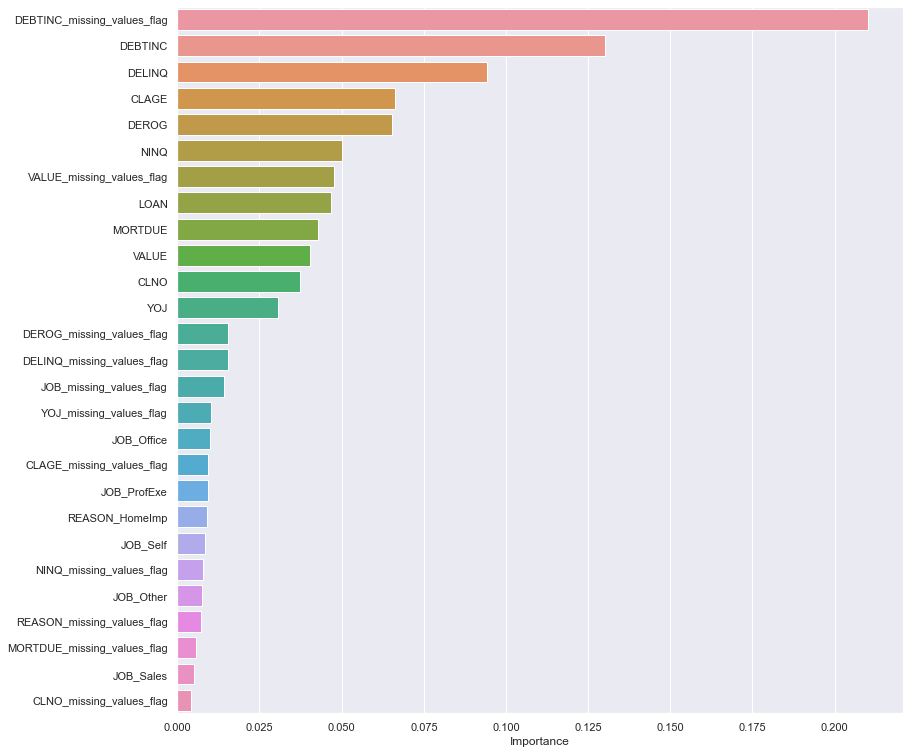

In [85]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
importances = rf_estimator_tuned2.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)


- Debt-to-income ratio is the most important features followed by Number of delinquent credit lines  , and Age of the oldest credit line in months.
- The other important features are Number of major derogatory reports(DROG),Number of existing credit lines(CLNO), Number of recent credit inquiries(NINQ),


### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).


### **Comparing Model Performances**

In [86]:
from sklearn import model_selection
from sklearn.svm import SVC

In [87]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [88]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [89]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [90]:
# Make the list of all the model names 

models = [lg, dt,d_tree_tuned,rf_estimator,rf_estimator_tuned, rf_estimator_tuned2]


# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [91]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Decision Tree', 'Tuned Decision Tree','Random Forest','Random Forest Classifier', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.876318,0.876957,0.598531,0.577957,0.722304,0.773381
1,Decision Tree,1.000000,0.865772,1.000000,0.618280,1.000000,0.701220
2,Tuned Decision Tree,0.854027,0.843400,0.828641,0.790323,0.590750,0.592742
3,Random Forest,1.000000,0.908277,1.000000,0.658602,1.000000,0.868794
4,Random Forest Classifier,1.000000,0.905481,1.000000,0.661290,1.000000,0.851211
5,Tuned Random Forest,0.880633,0.878635,0.805386,0.750000,0.659980,0.692308


**Insights: ________**
- As per comparison model, tuned forest model has the best performance as the accuracy is 88%, recall for test set is 75% the the highest recall and banl should use this model.